In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import os

print (os.listdir('/content/gdrive/My Drive/MILIZE/'))

['stan_data1.csv', 'temperature.csv', 'TimeSeries.ipynb', 'TalkAPI.gscript', 'stan_edward.ipynb', 'nikkei_morning_sql.csv', 'nikkei225.csv', 'jv.bin', 'ja.bin', 'ja.bin.syn1neg.npy', 'ja.tsv', 'ja.bin.syn0.npy', 'Renshu.ipynb', 'glove.6B.100d.txt', 'rf.pickle', 'Renshu2.ipynb', 'doc2vec_model', 'doc2vec_model2', 'NLP.ipynb']


Nikkei news, Doc2Vec

In [0]:
#!apt-get -q -y install sudo file mecab libmecab-dev mecab-ipadic-utf8 git
#!apt-get install mecab libmecab-dev mecab mecab-ipadic-utf8 git

!apt-get install libmecab-dev mecab mecab-ipadic-utf8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 8 newly installed, 0 to remove and 8 not upgraded.
Need to get 29.0 MB of archives.
After this operation, 277 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab-dev amd64 0.996-5 [308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-utils amd64 0.996-5 [4,856 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-jumandic-utf8 all 7.0-20130310-4 [16.2 MB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/universe amd64

In [0]:
!apt-get -q -y install swig

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 8 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 0s (9,539 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 111020 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpacking swig3.0 (3.0.12-1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_3.0.12-1_amd64.deb ...
Unpacking swig (3.0.12-

In [0]:
!pip install mecab-python3

  Running setup.py bdist_wheel for mecab-python3 ... - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/73/71/4f/63a79925b5e9bb38932043917cc60140beb8022ac14a952b1e
Successfully built mecab-python3


In [0]:
# check path to "ipadic-neologd" 
!echo `mecab-config --dicdir`"/mecab-ipadic-neologd"

/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#import MeCab

from tqdm import tqdm

import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [0]:
df_news = pd.read_csv('/content/gdrive/My Drive/MILIZE/nikkei_morning_sql.csv')

In [14]:
print ('shape of df_news: ', df_news.shape)
print (df_news.info())
df_news.head()

#df_news[df_news['NEWS_DATE']=='2018-05-29']
#df_news[df_news['NEWS_DATE']=='2018-11-04']

shape of df_news:  (3926, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3926 entries, 0 to 3925
Data columns (total 3 columns):
NEWS_DATE     3926 non-null object
NEWS_TIME     3926 non-null object
NEWS_TITLE    3926 non-null object
dtypes: object(3)
memory usage: 92.1+ KB
None


,NEWS_DATE,NEWS_TIME,NEWS_TITLE
0,2018-05-31,05:30,「失われたインフレ」 副作用に向き合う日銀
1,2018-05-31,05:30,ＩＨＩ、株価「27年ぶり三菱重超え」の真価証券部 太田明広
2,2018-05-31,06:31,ＮＹ円、反落 1ドル＝108円85～95銭で終了 イタリア懸念がやや後退
3,2018-05-31,05:08,ＮＹ商品 原油が反発 協調減産は年内継続との見方 金は上昇
4,2018-05-31,06:34,シカゴ日本株先物概況・30日


In [15]:
df_g = df_news.groupby('NEWS_DATE')['NEWS_TITLE'].sum().reset_index()

print (df_g.shape)
df_g.head()

(193, 2)


,NEWS_DATE,NEWS_TITLE
0,2018-05-29,４月の完全失業率2.5％ 前月比横ばいあおぞら銀、奨学金の返済手当19年度から、残高の計15...
1,2018-05-30,４月の小売販売額、前年比1.6％増イタリア中銀総裁「信用失う数歩手前」対中関税発動を再表明 ...
2,2018-05-31,「失われたインフレ」 副作用に向き合う日銀ＩＨＩ、株価「27年ぶり三菱重超え」の真価証券部 ...
3,2018-06-01,ＮＹ円、小反発 １ドル＝108円75～85銭、貿易摩擦の懸念でリスク回避ＮＹ商品、原油が反落...
4,2018-06-02,「ひとり勝ち」の色強める米国株ＮＱＮニューヨーク 松本清一郎ＮＹ円、反落 １ドル＝109円5...


In [0]:
#dates = df_news['NEWS_DATE'].unique()
#titles = df_news['NEWS_TITLE']

dates = df_g['NEWS_DATE']
titles = df_g['NEWS_TITLE']

In [0]:
idx = np.random.randint(len(dates))

txt = titles[idx]

tagger = MeCab.Tagger()
#tagger = MeCab.Tagger('-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')

tagger.parse('')

node = tagger.parseToNode(txt)
    
result = []
s1 = txt
flag = 0
while node:
  s2 = node.surface
  s3 = s1.replace(s2, '')
  hinshi = node.feature.split(',')[0]

  if flag == 1:
    result.append(s3)
    flag = 0
  if hinshi in ['名詞']:
    flag = 1
  elif hinshi in ['動詞', '形容詞']:
    result.append(node.feature.split(',')[6])
  else:
    pass

  s1 = s2
  node = node.next
  
print ('Date: ', dates[idx])  
print ('words: ', result)
print ('# of words: ', len(result))

Date:  2018-10-12
words:  ['10', '月', '米', '穀物', '需給', 'トウモロコシ', '生産', '見通し', '引き下げ', 'NY', '円', '5', '日', '続伸', '1', 'ドル', '=', '112', '円', '10', '～', '20', '銭', '米', '株', '安', 'リスク', '回避', '円', '買う', 'NY', '商品', '原油', '続落', '米', '在庫', '増', '金', '大幅', '続伸', 'NY', '株', '大幅', '続落', 'ダウ', '平均', '一時', '700', 'ドル', '近い', '下げ', '7', '月', '半ば', '以来', '安値', 'NY', '株', '大幅', '続落', '市場', '関係', '者', '見方', 'シカゴ', '日本', '株', '先物', '概況', '11', '日', 'テン', 'セント', '音楽', '配信', '子会社', '米', '上場', '延期', '株価', '急落', '米', '紙', '報道', 'ドイツ', '株', '11', '日', '続落', '1', '年', '8', 'か月', 'ぶり', '安値', 'メルク', '安い', 'ロンドン', '外為', '11', '日', '円', '続伸', 'ポンド', '3', '日', '続伸', 'ユーロ', '続伸', 'ロンドン', '株', '大幅', '続落', '6', 'カ月', '半', 'ぶり', '安値', '外為', '8', '時', '30', '分 ', '円', '小幅', '続伸', '112', '円', '台', '前半', '対', 'ユーロ', '安い', '日経', '平均', '先物', '夜間', '取引', '下落', '130', '円', '安', '2', '万', '2450', '円', '終了', '欧州', '国債', '概況', '11', '日', '独', '連邦', '債', '10', '年', '物', '0', '.', '039', '%', '低い', '0', '.', '520', '%', '米国'

In [0]:
%%time

tagged_docs = []

for date, title in tqdm(zip(dates, titles)):
  tagger = MeCab.Tagger()
  tagger.parse('')

  node = tagger.parseToNode(title)

  words = []
  s1 = title
  flag = 0
  while node:
    s2 = node.surface
    s3 = s1.replace(s2, '')
    hinshi = node.feature.split(',')[0]

    if flag == 1:
      words.append(s3)
      flag = 0
    if hinshi in ['名詞']:
      flag = 1
    elif hinshi in ['動詞', '形容詞']:
      words.append(node.feature.split(',')[6])
    else:
      pass

    s1 = s2
    node = node.next
    
  tagged_docs.append(TaggedDocument(words=words, tags=[date]))  

193it [00:00, 220.74it/s]

CPU times: user 634 ms, sys: 237 ms, total: 871 ms
Wall time: 880 ms


In [0]:
print ('# of tagged docs: ', len(tagged_docs))

# of tagged docs:  193


In [0]:
%%time

vec_size =100
alpha = 0.025
alpha_delta = 0.0002
max_epochs = 20

model = Doc2Vec(vector_size=vec_size, alpha=alpha, min_alpha=alpha, min_count=1, dm =1) 
model.build_vocab(tagged_docs)

for epoch in range(max_epochs):
  model.train(tagged_docs, total_examples=model.corpus_count, 
              epochs=model.iter)
  model.alpha -= alpha_delta
  model.min_alpha = model.alpha

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  if sys.path[0] == '':


CPU times: user 12.6 s, sys: 423 ms, total: 13 s
Wall time: 7.37 s


In [0]:
idx = np.random.randint(len(tagged_docs))

print ('Date: ', dates[idx])
print ('similar dates: ', model.docvecs.most_similar(dates[idx], topn=3))

Date:  2018-10-12
similar dates:  [('2018-10-11', 0.5852048993110657), ('2018-11-26', 0.5803170204162598), ('2018-08-27', 0.551065981388092)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
date1 = '2018-10-12'
date2 = '2018-10-11'

print (df_news[df_news['NEWS_DATE']==date1].sort_values('NEWS_TIME'))
print ()
print (df_news[df_news['NEWS_DATE']==date2].sort_values('NEWS_TIME'))

       NEWS_DATE NEWS_TIME                               NEWS_TITLE
3339  2018-10-12     00:00               三井住友トラスト、新運用会社　北米進出へ　菱田新社長
3344  2018-10-12     00:00      福岡空港を民営化、銀行団も後押し、政投銀・みずほ　1700億円協調融資
3338  2018-10-12     00:08   デジタル化推進、まず議員立法で　政府、19年に法案提出　行政手続き電子化など
1604  2018-10-12     00:34        欧州国債概況11日　独連邦債10年物は0.039%低い0.520%
1600  2018-10-12     00:38             ロンドン外為11日　円は続伸　ポンド3日続伸　ユーロ続伸
1601  2018-10-12     01:04                      ロンドン株、大幅続落　6カ月半ぶり安値
1599  2018-10-12     01:16              ドイツ株11日　続落　1年8か月ぶり安値　メルクが安い
1607  2018-10-12     01:24                 米長期金利上昇の要因、FRBが保有国債の圧縮加速
3343  2018-10-12     01:30            植物工場・AI、技術が高める食の安全進化アグリテック(中)
3345  2018-10-12     01:31                連結納税、ミス修正の事務負担軽く　政府税調で検討へ
3341  2018-10-12     02:00          放置預金に注意、10年で国が召し上げ　来年から総額6000億円
1595  2018-10-12     04:06        NY株大幅続落　ダウ平均、一時700ドル近い下げ7月半ば以来の安値
1594  2018-10-12     05:05                  NY商品　原油が続落、米在庫増で　金は大幅続伸
1605  2018-10-12     05:27          米国株、ダウ3日続落で2

Save & Load

In [0]:
from gensim.test.utils import get_tmpfile

In [0]:
path = '/content/gdrive/My Drive/MILIZE/'

fname = get_tmpfile(path+'doc2vec_model')

In [0]:
model.save(fname)

In [0]:
print (os.listdir(path))

['stan_data1.csv', 'temperature.csv', 'TimeSeries.ipynb', 'TalkAPI.gscript', 'stan_edward.ipynb', 'nikkei_morning_sql.csv', 'nikkei225.csv', 'jv.bin', 'ja.bin', 'ja.bin.syn1neg.npy', 'ja.tsv', 'ja.bin.syn0.npy', 'Renshu.ipynb', 'glove.6B.100d.txt', 'rf.pickle', 'Renshu2.ipynb', 'NLP.ipynb', 'doc2vec_model', 'doc2vec_model2']


In [0]:
path = '/content/gdrive/My Drive/MILIZE/'

loaded_model = Doc2Vec.load(path+'doc2vec_model')

In [26]:
#idx = np.random.randint(len(tagged_docs))

#print ('Date: ', dates[idx])
#print ('similar dates: ', loaded_model.docvecs.most_similar(dates[idx], topn=3))

similar_dates = loaded_model.docvecs.most_similar('2018-07-10', topn=3)
print ('date 1:', similar_dates[0][0])
print ('date 2:', similar_dates[1][0])
print ('date 3:', similar_dates[2][0])


date 1: 2018-08-04
date 2: 2018-09-04
date 3: 2018-08-13


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


No more updates

In [0]:
model.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

Infer vector for a new document

In [0]:
#vector = model.infer_vector(['米ダウ平均', '上昇'])
vector = loaded_model.infer_vector(['米ダウ平均', '上昇'])

print (str(vector[:10]))

[-0.03000515  0.01961298  0.02083458  0.02998687  0.0247659   0.03474921
  0.02212027  0.02223486 -0.00922806  0.01118494]


Clustering

In [0]:
#doc_vectors = model.docvecs.doctag_syn0
doc_vectors = model.docvecs.vectors_docs

print ('shape of doc_vectors: ', doc_vectors.shape)
#print (doc_vectors[0])

shape of doc_vectors:  (193, 50)
[ 2.2968132   0.86305875 -3.5605469  -1.8305097  -0.90148985  0.57589185
  1.4916911   1.6350749   0.72660017 -1.6327242  -0.24021094  3.5560017
  1.1994728   1.5243666   2.576379    3.3620005   0.02282843 -1.8634372
 -1.8126019   1.13979     1.1701598  -0.95009035 -1.1308987  -1.3636521
 -0.4293085  -0.59224737  2.1330984   0.98886657  1.9449342   3.1476755
 -0.175036   -0.15328068 -2.9238021   0.4632234  -0.10374901 -0.54329926
  1.6909726   1.7892458   1.8798019   0.9064948   3.6350312   0.95306444
 -1.7416489   2.9307127  -0.86450195 -1.6984539  -0.10661379 -2.8002548
  2.6406755   0.5426377 ]


In [0]:
kmeans_model = KMeans(n_clusters=3, init='k-means++', max_iter=100)  
kmeans_model.fit(doc_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [0]:
labels=kmeans_model.labels_.tolist()

print (len(labels))
print (labels)

193
[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0]


In [0]:
pca = PCA(n_components=2).fit(doc_vectors)
datapoint = pca.transform(doc_vectors)

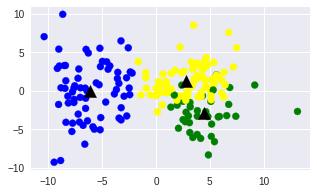

In [0]:
plt.figure(figsize=(5, 3))
#label1 = ["#FFFF00", "#008000", "#0000FF", "#800080"]
label1 = ["#FFFF00", "#008000", "#0000FF"]

color = [label1[i] for i in labels]

plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

In [0]:
col_dates = 'DATE'
dtype = {'CLOSE':'float', 'OPEN':'float','HIGH':'float',
         'LOW':'float','VOL':'object'}

df_nikkei = pd.read_csv('/content/gdrive/My Drive/MILIZE/nikkei225.csv',
                             parse_dates=[col_dates], dtype=dtype)
#df_nikkei = pd.read_csv('/content/gdrive/My Drive/MILIZE/nikkei225.csv', encoding='cp932')

#df_nikkei = pd.read_csv('/content/gdrive/My Drive/MILIZE/nikkei225.csv', usecols=[0,1,2,3,4,5])

In [0]:
print ('shape of df_nikkei: ', df_nikkei.shape)
print (df_nikkei.info())
df_nikkei.head()

shape of df_nikkei:  (235, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 6 columns):
DATE      235 non-null datetime64[ns]
CLOSE     235 non-null float64
OPEN      235 non-null float64
HIGH      235 non-null float64
LOW       235 non-null float64
VOLUME    235 non-null object
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 11.1+ KB
None


,DATE,CLOSE,OPEN,HIGH,LOW,VOLUME
0,2018-12-13,21816.19,21755.13,21871.34,21675.66,816.71M
1,2018-12-12,21602.75,21348.40,21631.47,21320.72,923.72M
2,2018-12-11,21148.02,21273.04,21279.02,21062.31,902.49M
3,2018-12-10,21219.50,21319.47,21365.78,21169.96,813.67M
4,2018-12-07,21678.68,21643.75,21734.94,21506.45,804.62M


In [0]:
df_nikkei['UpDown'] = (df_nikkei['CLOSE'] - df_nikkei['OPEN'] > 0).astype(int)

In [0]:
df_nikkei.head()

,DATE,CLOSE,OPEN,HIGH,LOW,VOLUME,UpDown
0,2018-12-13,21816.19,21755.13,21871.34,21675.66,816.71M,1
1,2018-12-12,21602.75,21348.40,21631.47,21320.72,923.72M,1
2,2018-12-11,21148.02,21273.04,21279.02,21062.31,902.49M,0
3,2018-12-10,21219.50,21319.47,21365.78,21169.96,813.67M,0
4,2018-12-07,21678.68,21643.75,21734.94,21506.45,804.62M,1


In [0]:
df_nikkei['DATE'][100]

Timestamp('2018-07-20 00:00:00')

In [0]:
kmeans_model = KMeans(n_clusters=4, init='k-means++', max_iter=100)  
X = kmeans_model.fit(d2v_model.docvecs.doctag_syn0)
labels=kmeans_model.labels_.tolist()


(193, 50)

In [0]:
l = kmeans_model.fit_predict(d2v_model.docvecs.doctag_syn0)
pca = PCA(n_components=2).fit(d2v_model.docvecs.doctag_syn0)
datapoint = pca.transform(d2v_model.docvecs.doctag_syn0)

In [0]:
plt.figure
label1 = ["#FFFF00", "#008000", "#0000FF", "#800080"]
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

Exercise

Mecab

In [0]:
tagger = MeCab.Tagger()
result = tagger.parse('メイが恋ダンスを踊っている。')
print (result)

メイ	名詞,一般,*,*,*,*,*
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
恋	名詞,一般,*,*,*,*,恋,コイ,コイ
ダンス	名詞,サ変接続,*,*,*,*,ダンス,ダンス,ダンス
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
踊っ	動詞,自立,*,*,五段・ラ行,連用タ接続,踊る,オドッ,オドッ
て	助詞,接続助詞,*,*,*,*,て,テ,テ
いる	動詞,非自立,*,*,一段,基本形,いる,イル,イル
。	記号,句点,*,*,*,*,。,。,。
EOS



In [0]:
tagger = MeCab.Tagger('-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')
result = tagger.parse('メイが恋ダンスを踊っている。')
print (result)

RuntimeError: ignored

In [0]:
tagger = MeCab.Tagger()
#tagger = MeCab.Tagger('-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')

tagger.parse('')

txt = 'UAEアルアインがPK勝ち　サッカークラブW杯開幕'
#txt = 'クラブW杯開幕、3連覇に挑むレアル　雪辱期す鹿島'
#txt = 'シカゴ日経平均先物続伸、300円高の２万1645円'
#txt = 'ＮＹ株反発157ドル高　米中交渉の進展期待 '

node = tagger.parseToNode(txt)

#s1 = txt
#while node:
#  #word = node.surface
#  #hinshi = node.feature.split(',')[0]
#  #print(word + ': ' + hinshi)
  
#  #test = node.feature.split('.')[0]
#  #test = node.surface
#  #test = node.feature
#  #test = node.length
#  #test = node.surface[:node.length]
  
#  s2 = node.surface
#  s3 = s1.replace(s2, '')

#  print (s3)   
#  s1 = s2
#  node = node.next
    
result = []
s1 = txt
flag = 0
while node:
  s2 = node.surface
  s3 = s1.replace(s2, '')
  hinshi = node.feature.split(',')[0]

  if flag == 1:
    result.append(s3)
    flag = 0
  if hinshi in ['名詞']:
    flag = 1
  elif hinshi in ['動詞', '形容詞']:
    result.append(node.feature.split(',')[6])
  else:
    pass

#  print (hinshi)
#  print (s3)
#  print ()

  s1 = s2
  node = node.next
  
print (result)

['UAE', 'アルアイン', 'PK', '勝ち', 'サッカー', 'クラブ', 'W', '杯', '開幕']


Gensim

In [0]:
sent1 = TaggedDocument(words=['ＮＹ', '株', '反発', '157', 'ドル', '高', '米', '中', '交渉', '進展', '期待 '],
                       tags=['d1'])
#sent2 = TaggedDocument(words=['シカゴ', '日経', '平均', '先物', '続伸', '300', '円', '高', '２', '万', '1645', '円'], 
#                       tags=['d2'])
sent2 = TaggedDocument(words=['ＮＹ', '株', '反発', '157', 'ドル', '高', '米', '中', '交渉', '進展', '期待 '], 
                       tags=['d2'])
sent3 = TaggedDocument(words=['UAE', 'アルアイン', 'PK', '勝ち', 'サッカー', 'クラブ', 'W', '杯', '開幕'], 
                       tags=['d3'])
sent4 = TaggedDocument(words=['クラブ', 'W', '杯', '開幕', '3', '連覇', '挑む', 'レアル', '雪辱', '期す', '鹿島'], 
                       tags=['d4'])

training_docs = []

# 各TaggedDocumentをリストに格納
training_docs.append(sent1)
training_docs.append(sent2)
training_docs.append(sent3)
training_docs.append(sent4)

#vector_size = 100
#alpha = 0.01
#dm = 1

#model = Doc2Vec(documents=training_docs, alpha=alpha, min_alpha=alpha, 
#                vector_size=vector_size, min_count=1, dm=dm)

vec_size = 50
alpha = 0.025
alpha_delta = 0.0002
max_epochs = 20

model = Doc2Vec(vector_size=vec_size, alpha=alpha, min_alpha=alpha, min_count=1, dm =1) 
model.build_vocab(training_docs)

#loss_list = []

for epoch in range(max_epochs):
  model.train(training_docs, total_examples=model.corpus_count, 
              epochs=model.iter)
  model.alpha -= alpha_delta
  model.min_alpha = model.alpha
  #loss_list.append(model.get_latest_training_loss())  

#model.save('doc2vec.model')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


In [0]:
# model = Doc2Vec.load('doc2vec.model')

#print (model.docvecs['d1'])
 
print (model.docvecs.most_similar('d1'))
print (model.docvecs.most_similar('d2'))
print (model.docvecs.most_similar('d3'))
print (model.docvecs.most_similar('d4'))

[('d4', 0.8644113540649414), ('d3', 0.8571215867996216), ('d2', 0.8530251979827881)]
[('d1', 0.8530251979827881), ('d4', 0.8461098670959473), ('d3', 0.8386576771736145)]
[('d4', 0.8906357288360596), ('d1', 0.8571215867996216), ('d2', 0.8386576771736145)]
[('d3', 0.8906357288360596), ('d1', 0.864411473274231), ('d2', 0.8461098670959473)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
test_words=['クラブ', 'W', '杯', '開幕', '3', '連覇', '挑む', 'レアル', '雪辱', '期す', '鹿島']

if_vector = model.infer_vector(test_words)

#print (if_vector)
print (model.docvecs.most_similar([if_vector]))

[('d2', 0.24262067675590515), ('d1', 0.20512042939662933), ('d3', 0.18466761708259583), ('d4', 0.09778133779764175)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
path = '/content/gdrive/My Drive/MILIZE/'

#model = gensim.models.KeyedVectors.load_word2vec_format(path + 'jv.bin', binary=True)
#model = gensim.models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)

#model = gensim.models.Word2Vec.load(path + 'ja.bin')
model = gensim.models.Word2Vec.load(path + 'jv.bin')

In [0]:
#model.wv['king']
model.wv.most_similar('rain')
#model.wv.most_similar(positive=['woman', 'king'], negative=['man'])

KeyError: ignored

In [0]:
#model.wv['日本']
model.wv.most_similar('株')
#model.wv.most_similar(positive=['相撲', '女'], negative=['男'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('株式', 0.6391130685806274),
 ('万株', 0.5737311244010925),
 ('商事', 0.4947361946105957),
 ('ホールディングス', 0.4552867114543915),
 ('株主', 0.4537278413772583),
 ('ファンド', 0.45059922337532043),
 ('動産', 0.444718599319458),
 ('万円相当', 0.4376410245895386),
 ('債券', 0.4318397641181946),
 ('フィナンシャルグループ', 0.4272547960281372)]